In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import ipywidgets
from plot_utils import get_model_names_for_degree

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

['chebyshev_linear_regression_big_2x' 'chebyshev_linear_regression_toy'
 'chebyshev_linear_regression_toy_0.2_noise'
 'chebyshev_linear_regression_toy_0.5_noise_0.00005_lr'
 'chebyshev_linear_regression_toy_11_take_1'
 'chebyshev_linear_regression_toy_16_layers'
 'chebyshev_linear_regression_toy_chebyshev_as_baseline_for_loss'
 'chebyshev_linear_regression_toy_just_base_8'
 'chebyshev_linear_regression_toy_noise'
 'chebyshev_linear_regression_toy_standard_0.00005_lr_no_noise_no_curriculum'
 'chebyshev_linear_regression_toy_uniform_sampling'
 'chebyshev_linear_regression_toy_weighted_mse' 'curriculum'
 'kernel_linear_regression_toy_basis_4'
 'kernel_linear_regression_toy_basis_4_dim_1'
 'kernel_linear_regression_toy_basis_4_normalized'
 'kernel_linear_regression_toy_basis_4_normalized_x_scale_2'
 'kernel_linear_regression_toy_dim_20_basis_2'
 'kernel_linear_regression_toy_just_basis_4_log' 'lr00005'
 'with_curriculum']
                                    run_id                         t

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
113,chebyshev-2x-0.0001,kernel_linear_regression,Transformer-plus,basis_dim=11_different_degrees=True_highest_de...,-1,-1,1,24,16,chebyshev_linear_regression_big_2x
0,c615f0ae-9309-49eb-a6cc-0c2680555c79,soft_prompting,chebyshev_linear_regression_toy,basis_dim=3_different_degrees=False_highest_de...,-1,-1,1,6,4,chebyshev_linear_regression_toy
89,cfcec5eb-fc68-418b-9db9-67dba126a721,soft_prompting_comparisions,chebyshev_linear_regression_toy,basis_dim=5_fixed_coeffs=3_highest_degree=5_lo...,-1,-1,1,6,4,chebyshev_linear_regression_toy
88,50162e7c-8281-4e71-98a6-040b0eaa58ba,soft_prompting_comparisions,chebyshev_linear_regression_toy,basis_dim=5_fixed_coeffs=0_highest_degree=5_lo...,-1,-1,1,6,4,chebyshev_linear_regression_toy
87,eeaa5a62-debc-4b0e-955b-eeacc8cf2560,soft_prompting_comparisions,chebyshev_linear_regression_toy,basis_dim=5_degree=5_perturbation=0.4,-1,-1,1,6,4,chebyshev_linear_regression_toy
...,...,...,...,...,...,...,...,...,...,...
130,basis-4-normalized-x-scale-2,kernel_linear_regression,Transformer,basis_dim=4,-1,-1,5,12,8,kernel_linear_regression_toy_basis_4_normalize...
95,high-dimension-joint-linear-quadratic,kernel_linear_regression,Transformer,basis_dim=2,-1,-1,20,12,8,kernel_linear_regression_toy_dim_20_basis_2
112,a6c28d4b-4687-4631-9f46-1f5acbe1c18c,kernel_linear_regression,Transformer,basis_dim=4,-1,-1,5,12,8,kernel_linear_regression_toy_just_basis_4_log
137,lr_00005,kernel_linear_regression,Transformer,basis_dim=11_different_degrees=True_highest_de...,-1,-1,1,12,8,lr00005


In [4]:
task = "kernel_linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "soft-prompting-2-tokens-2-roots"  # if you train more models, replace with the run_id from the table above
#run_id = "lr_00005"
run_path = os.path.join(run_dir, "soft_prompting", run_id)


run_id_big = "small-1-11-5M-steps"
run_path_big = os.path.join(run_dir, task, run_id_big)

#run_id_noise_2 = "0.25x-micro-no-noise-batch-8192-basis-1-4-500k"
#run_path_noise_2 = os.path.join(run_dir, task, run_id_noise_2) 


#run_path = '/home/riadoshi/CS182Project/models/kernel_linear_regression/cde31f7a-93a0-4aa6-b833-37e178b50ae4' # enter the path to the downloaded checkpoint here
metrics = get_run_metrics(run_path, run_path_big, None, include_noise=False, ground_truth_loss=False, smoothing=0.00)  # these are normally precomputed at the end of training


torch.Size([1, 128])
PROMPT:  tensor([[[0.8882],
         [0.4932],
         [0.5753],
         [0.8658]]], grad_fn=<UnsafeViewBackward0>)
Orthogonal component:  tensor(6.6414, grad_fn=<CopyBackwards>)
total norm:  tensor(19.9519, grad_fn=<CopyBackwards>)
../models/soft_prompting/soft-prompting-2-tokens-2-roots/metrics.json
no metrics found
{'task_name': 'polynomial_shared_roots', 'n_dims': 1, 'n_points': 31, 'batch_size': 64, 'data_name': 'uniform', 'prompting_strategy': 'standard'}
0.2
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31, 5])
(64, 4)
torch.Size([64, 31,

# Plot pre-computed metrics

../models
chebyshev_linear_regression_toy soft-prompting-2-tokens-2-roots
torch.Size([1, 128])
PROMPT:  tensor([[[0.8882],
         [0.4932],
         [0.5753],
         [0.8658]]], grad_fn=<UnsafeViewBackward0>)
Orthogonal component:  tensor(6.6414, grad_fn=<CopyBackwards>)
total norm:  tensor(19.9519, grad_fn=<CopyBackwards>)
../models/soft_prompting/soft-prompting-2-tokens-2-roots/metrics.json
{'task_name': 'polynomial_shared_roots', 'n_dims': 1, 'n_points': 31, 'batch_size': 64, 'data_name': 'uniform', 'prompting_strategy': 'standard'}
0.2
0.2
0.2
0.2
0.2
0.2
0.2
0.2
{'degree-4': {'chebyshev_4_driver=None': {'mean': [0.27982375025749207, 0.24570591747760773, 0.16304874420166016, 0.08150038868188858, 0.01998445764183998, 6.732705514878035e-06, 5.288067761455295e-10, 7.310521632497569e-10, 4.5445227442320046e-11, 1.569774865650686e-11, 7.430702646075982e-13, 3.0505787240904525e-13, 1.2320709502546684e-13, 3.114375890424931e-13, 6.801862946579501e-14, 1.1272735268028425e-13, 6.1968367

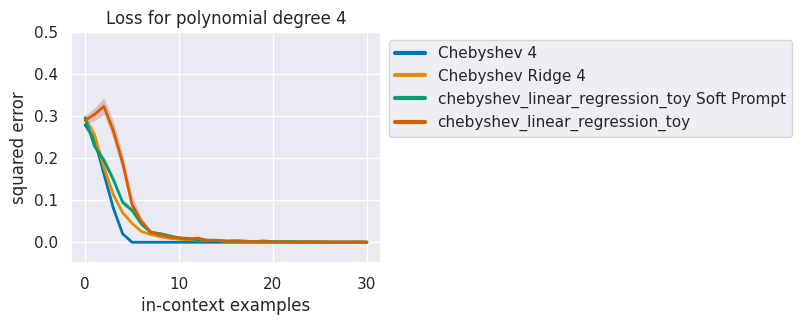

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 5', 'Chebyshev Ridge 5', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


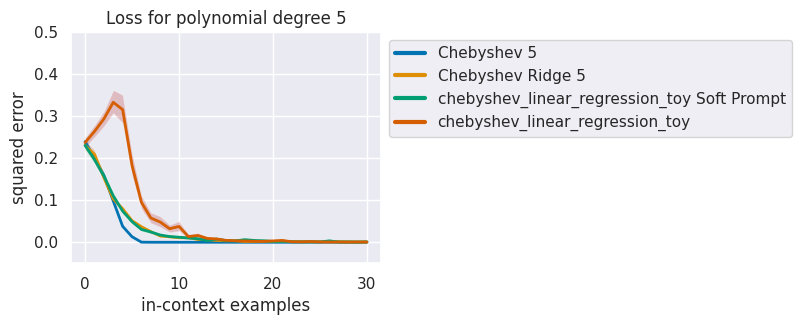

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 6', 'Chebyshev Ridge 6', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


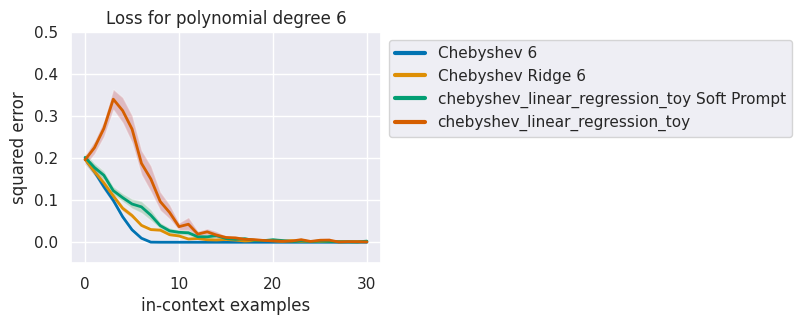

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 7', 'Chebyshev Ridge 7', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


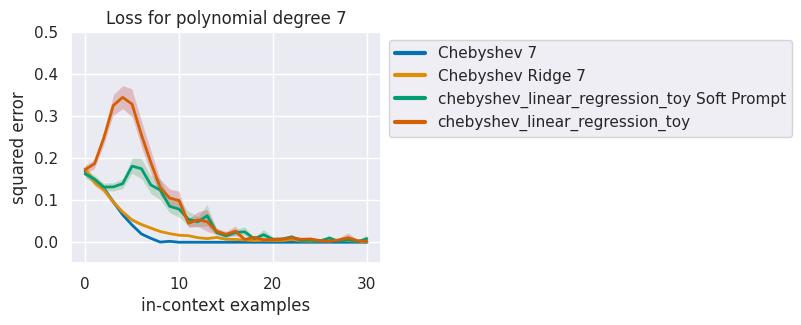

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 8', 'Chebyshev Ridge 8', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


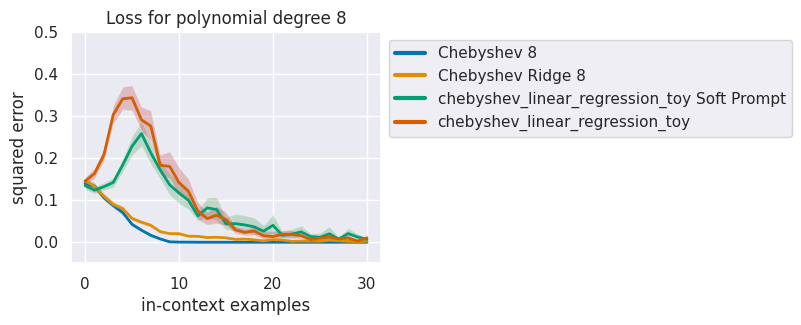

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 9', 'Chebyshev Ridge 9', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


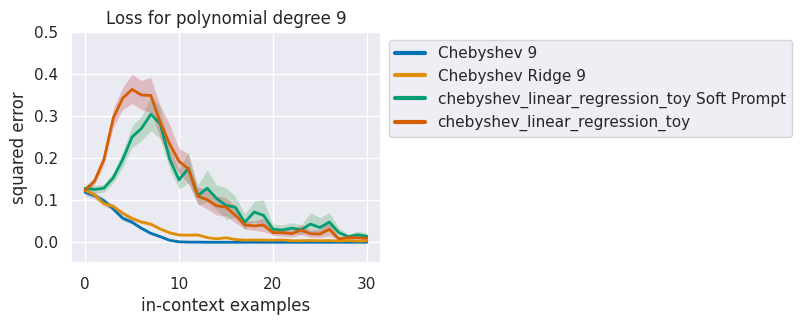

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 10', 'Chebyshev Ridge 10', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


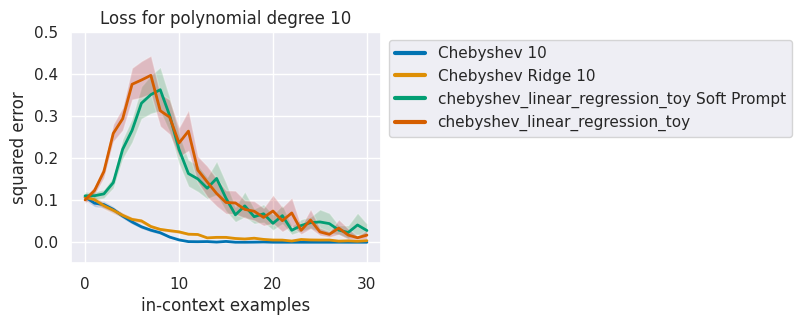

None
dict_keys(['degree-10', 'degree-11', 'degree-4', 'degree-5', 'degree-6', 'degree-7', 'degree-8', 'degree-9'])
dict_keys(['Chebyshev 11', 'Chebyshev Ridge 11', 'chebyshev_linear_regression_toy Soft Prompt', 'chebyshev_linear_regression_toy'])


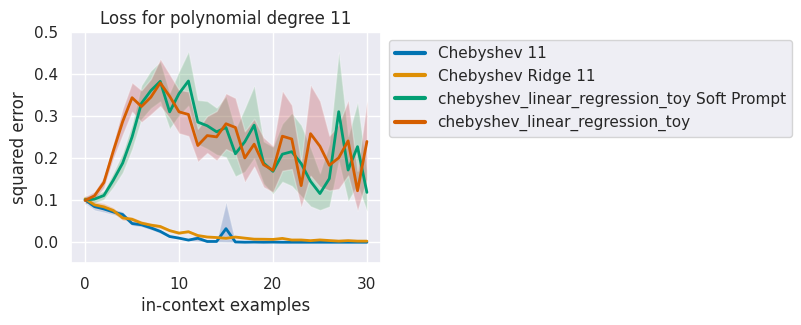

In [5]:
def valid_row(r, run_id):
    return r.task == "soft_prompting" and r.run_id == run_id

print(run_dir)
metrics = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.00)

#metrics_smooth = collect_results(run_dir, df, valid_row=lambda x: valid_row(x, run_id), smoothing=0.01)
#metrics_big = collect_results(run_dir, df, valid_row= lambda x: valid_row(x, run_id_big), smoothing=0.00)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

#for k, v in metrics_big.items():
#    for k2, v2 in v.items():
#        if "Transformer" in k2:
#            metrics[k][k2] = v2
#for k, v in metrics_smooth.items():
#    for k2, v2 in v.items():
#        if "Transformer" in k2:
#            metrics[k][k2+ " Smoothed"] = v2

ylims = [2, 2, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
for degree in range(4, 12):
    models = get_model_names_for_degree(degree)
    print(models)
    print(metrics.keys())
    print(metrics["degree-" + str(degree)].keys())
    basic_plot(metrics["degree-" + str(degree)], models=models, ylim=ylims[degree-1])
    plt.title("Loss for polynomial degree " + str(degree))
    plt.savefig("graphs/degree-" + str(degree) + ".png", dpi=300, bbox_inches='tight')
    plt.show()